#### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (GridSearchCV, train_test_split,)

#### Load the dataset

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y = True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Grid Search

In [ ]:
svm = SVC(random_state=0)

param_grid=[{'C': [1,10,100,1000], 'kernel': ['linear']},
            {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
            ]

In [ ]:
search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=3, refit=True)
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [ ]:
search.best_params_

{'C': 100, 'kernel': 'linear'}

In [ ]:
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.728873,0.218982,0.002669,0.000017,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.947368,0.969925,0.939394,0.952229,0.012929,4
1,3.502934,1.355876,0.002584,0.000048,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.954887,0.977444,0.946970,0.959767,0.012911,3
2,12.644597,2.814299,0.002673,0.000109,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.962406,0.984962,0.946970,0.964779,0.015601,1
3,10.208438,4.900953,0.002573,0.000025,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.962406,0.984962,0.946970,0.964779,0.015601,1
4,0.008250,0.000220,0.004695,0.000136,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.932331,0.909774,0.901515,0.914540,0.013024,9


In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score', 'std_test_score',]].head()

,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
0,100,linear,NaN,0.964779,0.015601
1,1000,linear,NaN,0.964779,0.015601
2,10,linear,NaN,0.959767,0.012911
3,1,linear,NaN,0.952229,0.012929
4,10,rbf,0.0001,0.944691,0.017844


Text(0.5, 0, 'Hyperparameter combinations')

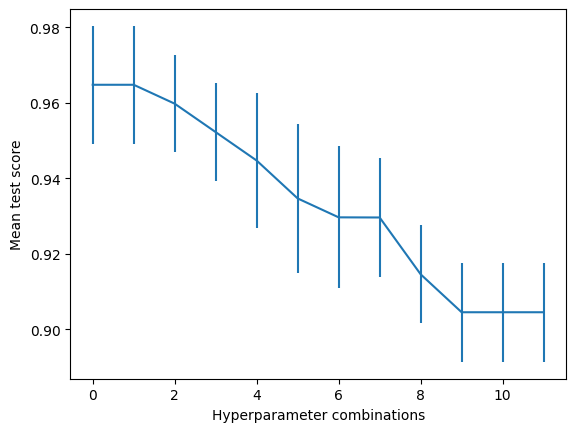

In [ ]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [ ]:
X_train_preds = search.predict(X_train)
X_test_preds = search.predict(X_test)

print('Train roc_auc: ', accuracy_score(y_train, X_train_preds))
print('Test roc_auc: ', accuracy_score(y_test, X_test_preds))

Train roc_auc:  0.9798994974874372
Test roc_auc:  0.9473684210526315
